Analisis de regresion no lineal con python:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Aveces necesitamos otros nodelos no lineales para ajustarlo a los datos, asi que vamos a ver 1 por 1:

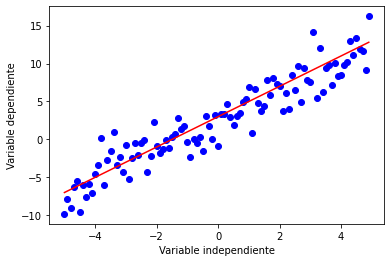

In [7]:
#lineal
x = np.arange(-5.0, 5.0, 0.1)

y = 2*(x) + 3
yruido = 2*np.random.normal(size = x.size)
ydata = y + yruido

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Variable independiente")
plt.ylabel("Variable dependiente")
plt.show()

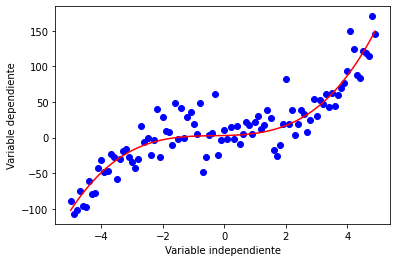

In [9]:
#Cubico
x = np.arange(-5.0, 5.0, 0.1)

y = x**3 + x**2 + x + 3
yruido = 22*np.random.normal(size = x.size)
ydata = y + yruido

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Variable independiente")
plt.ylabel("Variable dependiente")
plt.show()

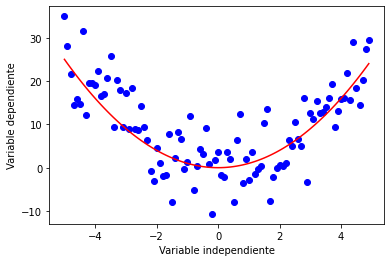

In [12]:
#Cuadratico
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x, 2)
yruido = 5*np.random.normal(size = x.size)
ydata = y + yruido

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Variable independiente")
plt.ylabel("Variable dependiente")
plt.show()

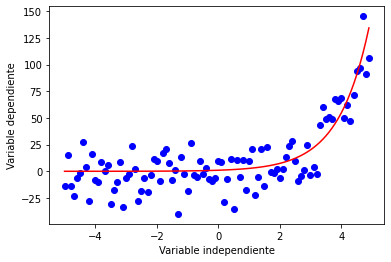

In [14]:
#Exponencial
x = np.arange(-5.0, 5.0, 0.1)

y = np.exp(x)
yruido = 15*np.random.normal(size = x.size)
ydata = y + yruido

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Variable independiente")
plt.ylabel("Variable dependiente")
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


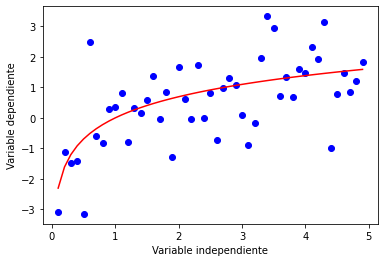

In [17]:
#Logaritmico
x = np.arange(-5.0, 5.0, 0.1)

y = np.log(x)
yruido = np.random.normal(size = x.size)
ydata = y + yruido

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Variable independiente")
plt.ylabel("Variable dependiente")
plt.show()

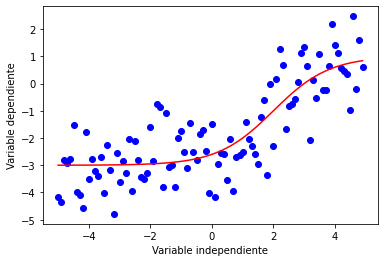

In [21]:
#Logistico/Sigmoide
x = np.arange(-5.0, 5.0, 0.1)

y = 1 - 4/(1 + np.power(3, x - 2))
yruido = np.random.normal(size = x.size)
ydata = y + yruido

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Variable independiente")
plt.ylabel("Variable dependiente")
plt.show()

Aplicamos uno de estos modelos al dataset, en este caso uno logistico:

In [22]:
import pandas as pd

df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


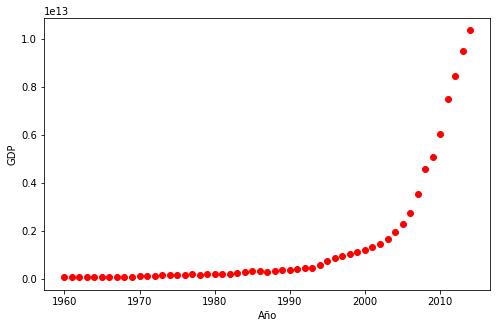

In [37]:
plt.figure(figsize = (8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)

plt.plot(x_data, y_data, 'ro')
plt.xlabel("Año")
plt.ylabel("GDP")
plt.show()

Modelo Sigmoide:

In [38]:
def sigmoid(x, beta_1, beta_2):
    y = 1/(1 + np.exp(-beta_1 * (x - beta_2)))
    return y

Ajustar el modelo a los datos:

In [49]:
x_data = x_data/max(x_data)
y_data = y_data/max(y_data)

In [50]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, x_data, y_data)

print("Beta 1: %.3f" % popt[0])
print("Beta 2: %.3f" % popt[1])

Beta 1: 690.453
Beta 2: 0.997


Graficamos los datos:

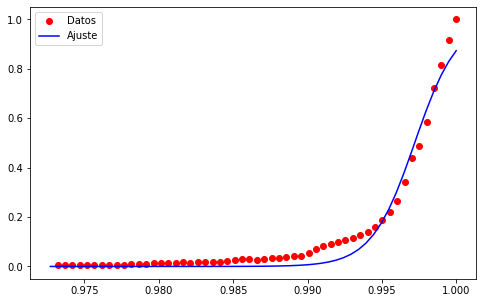

In [51]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)

plt.figure(figsize = (8, 5))
y = sigmoid(x, popt[0], popt[1])
plt.plot(x_data, y_data, 'ro', label='Datos')
plt.plot(x, y, 'b', label='Ajuste')
plt.legend(loc = "best")
plt.show()

Evaluacion del modelo

In [52]:
msk = np.random.rand(len(df)) < 0.8
train_x = x_data[msk]
test_x = x_data[~msk]
train_y = y_data[msk]
test_y = y_data[~msk]

#Entrenar el modelo usando el train
popt, pcov = curve_fit(sigmoid, train_x, train_y)

#Predecir
y_gorro = sigmoid(test_x, *popt)

#Evaluacion
from sklearn.metrics import r2_score
print("Accuracy: %.3f" % r2_score(y_gorro, test_y))

Accuracy: 0.964
